In [49]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..\project1')

import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import self-made modules
from linear_model import LinearModel
from make_data import FrankeFunction
from prepare_data import create_design_matrix
from model_selection import R2, MSE, cross_validation

# Import plotting functions
from plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [50]:
# Choose hyperparameters for model
pol_degree = 5
data_size = 2000
test_size = 0.2
error_std = 0

In [51]:
# Make data
x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(loc=0, scale=error_std)

In [52]:
# Define empty list in which to store the MSE
mses_test = []
mses_train = []

X = create_design_matrix(x, y, 5)

# Test for 5 - 10 folds
for i in range(5, 11):
    mse_test, mse_train = cross_validation(X, z, i)
    mses_test.append(mse_test)
    mses_train.append(mse_train)

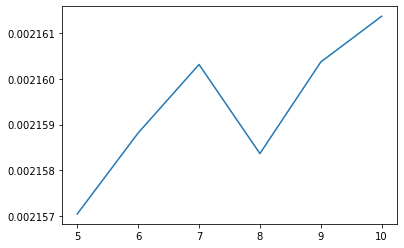

In [53]:
plt.plot(range(5, 11), mses_train)

In [54]:
mses_train

[0.0021570454472663826,
 0.0021588182442440714,
 0.0021603166886575804,
 0.0021583666864270715,
 0.002160370922879127,
 0.00216137287502839]

In [60]:
lr_sk = LinearRegression()

for i in range(5, 11):
    scores = cross_val_score(lr_sk, X, z, cv=i, scoring='neg_mean_squared_error')
    print(np.mean(scores))

-0.0022356960662865376
-0.0022272196092582783
-0.0022164226404093154
-0.002262953454280785
-0.0022351311907996977
-0.0022250198629881167


In [56]:
np.mean(scores)

-0.0022356960662865376